## Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Funções

## Carregando a Base

In [7]:
# Caso 
df = pd.read_csv("./Bases/base.csv")

## Análise Exploratória

In [10]:
# Convertendo Coluna date para datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Ordenar o dataframe por state e date para garantir que as datas estejam em ordem
df = df.sort_values(by=['state', 'date'])

# Agrupar por estado e calcular a diferença dia a dia
df['confirmed_daily'] = df.groupby('state')['confirmed'].diff().fillna(df['confirmed'])
df['deaths_daily'] = df.groupby('state')['deaths'].diff().fillna(df['deaths'])
df['death_rate_daily'] = df['deaths_daily'] / df['confirmed_daily']

In [11]:
df.describe().T

c:\Users\dupga\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,min,25%,50%,75%,max,std
date,19762,2021-03-17 23:14:49.343183872,2020-02-25 00:00:00,2020-09-14 00:00:00,2021-03-17 00:00:00,2021-09-17 00:00:00,2022-03-27 00:00:00,NaN
confirmed,19762.0,465498.105354,0.0,85816.5,244257.5,539522.75,5232374.0,688475.302036
deaths,19762.0,12465.451624,0.0,1842.0,6043.5,13558.5,167110.0,21652.086659
order_for_place,19762.0,366.612337,1.0,183.25,366.0,549.0,750.0,211.548197
estimated_population,19762.0,7913264.095233,631181.0,2809394.0,4064052.0,9616621.0,46289333.0,9188175.447382
confirmed_per_100k_inhabitants,19756.0,6951.675635,0.00216,2355.830548,6128.78199,10544.970693,25521.03172,5490.161951
death_rate,19762.0,0.02639,0.0,0.0195,0.0234,0.0281,0.2222,0.014829
confirmed_daily,19762.0,1510.461492,-12028.0,189.0,618.0,1535.75,105200.0,3032.264866
deaths_daily,19762.0,33.354873,-84.0,3.0,11.0,31.0,1389.0,74.475117
death_rate_daily,19574.0,inf,-0.972727,0.009317,0.01989,0.035831,inf,NaN


- Verificando Nulos

In [12]:
df.isnull().sum()

date                              0
state                             0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population              0
confirmed_per_100k_inhabitants    6
death_rate                        0
confirmed_daily                   0
deaths_daily                      0
dtype: int64

- Eliminando Duplicadas

In [13]:
df.drop_duplicates()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,confirmed_daily,deaths_daily
1455,2020-03-17,AC,3,0,1,False,894470.0,0.33539,0.0000,3.0,0.0
1454,2020-03-18,AC,3,0,2,False,894470.0,0.33539,0.0000,0.0,0.0
1453,2020-03-19,AC,4,0,3,False,894470.0,0.44719,0.0000,1.0,0.0
1452,2020-03-20,AC,7,0,4,False,894470.0,0.78259,0.0000,3.0,0.0
1451,2020-03-21,AC,11,0,5,False,894470.0,1.22978,0.0000,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17597,2022-03-21,TO,302166,4141,690,False,1590248.0,19001.18724,0.0137,300.0,1.0
17596,2022-03-22,TO,302289,4141,691,False,1590248.0,19008.92188,0.0137,123.0,0.0
17595,2022-03-23,TO,302387,4142,692,False,1590248.0,19015.08444,0.0137,98.0,1.0
17594,2022-03-24,TO,302443,4142,693,False,1590248.0,19018.60590,0.0137,56.0,0.0


##

## Análise Univariada

- Date

In [14]:
print(f"Date mínimo = {df['date'].min()}")
print(f"Date máximo = {df['date'].max()}")

Date mínimo = 2020-02-25 00:00:00
Date máximo = 2022-03-27 00:00:00


- estimated_population

<Axes: >

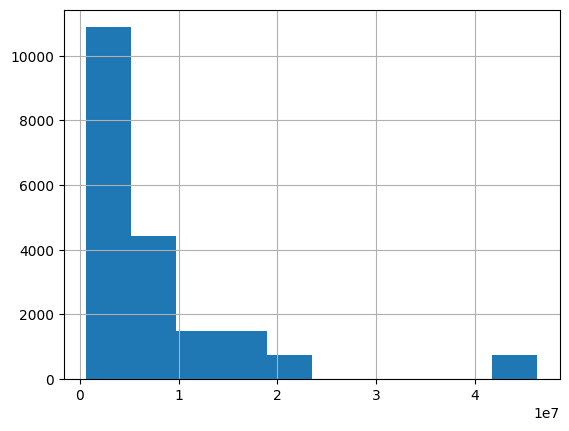

In [15]:
df['estimated_population'].hist()

- confirmed_daily e deaths_Daily

<Axes: >

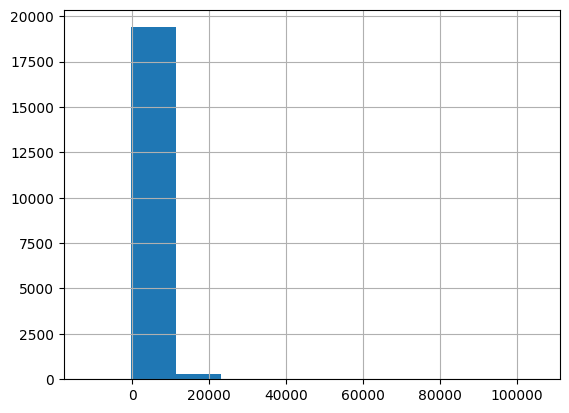

In [25]:
df['confirmed_daily'].hist()

<Axes: >

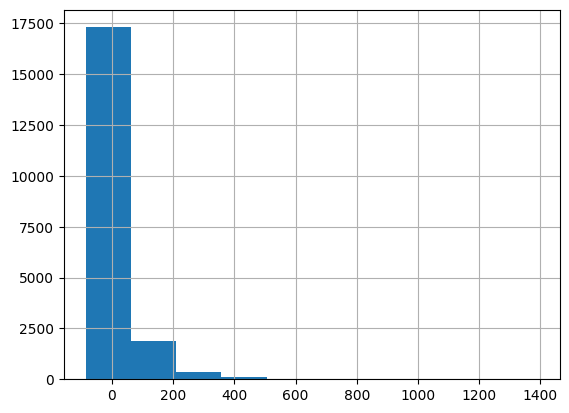

In [26]:
df['deaths_daily'].hist()

## Análise Bivariada